In [192]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pyactlike

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compare theory to data and look at residuals
We'll first read in the best-fitting ACT+WMAP spectrum. It contains ell, D_TT, D_TE, D_EE

In [193]:
like = pyactlike.ACTPowerSpectrumData()

# Read an the spectrum from disk.
filename_wa = like.data_dir + "bf_ACTPol_lcdm.minimum.theory_cl"
tt_lmax = 5000

ell, dell_tt, dell_te, dell_ee = np.genfromtxt(
    filename_wa,
    delimiter=None,
    unpack=True,
    max_rows=tt_lmax - 1,
    usecols=(0, 1, 2, 3),
)

Now let's find the chisq for this model using pyactlike

In [194]:
like = pyactlike.ACTPowerSpectrumData()

chi2 = -2 * like.loglike(dell_tt, dell_te, dell_ee, 1.0)
print("ACT model chi2 = " + "{0:.2f}".format(chi2)+ " for 260 data points")

ACT model chi2 = 279.06 for 260 data points


Next identify the TT, TE and EE bins, data and errors. We will look at the 'wide' patch data. 

(0, 6000)

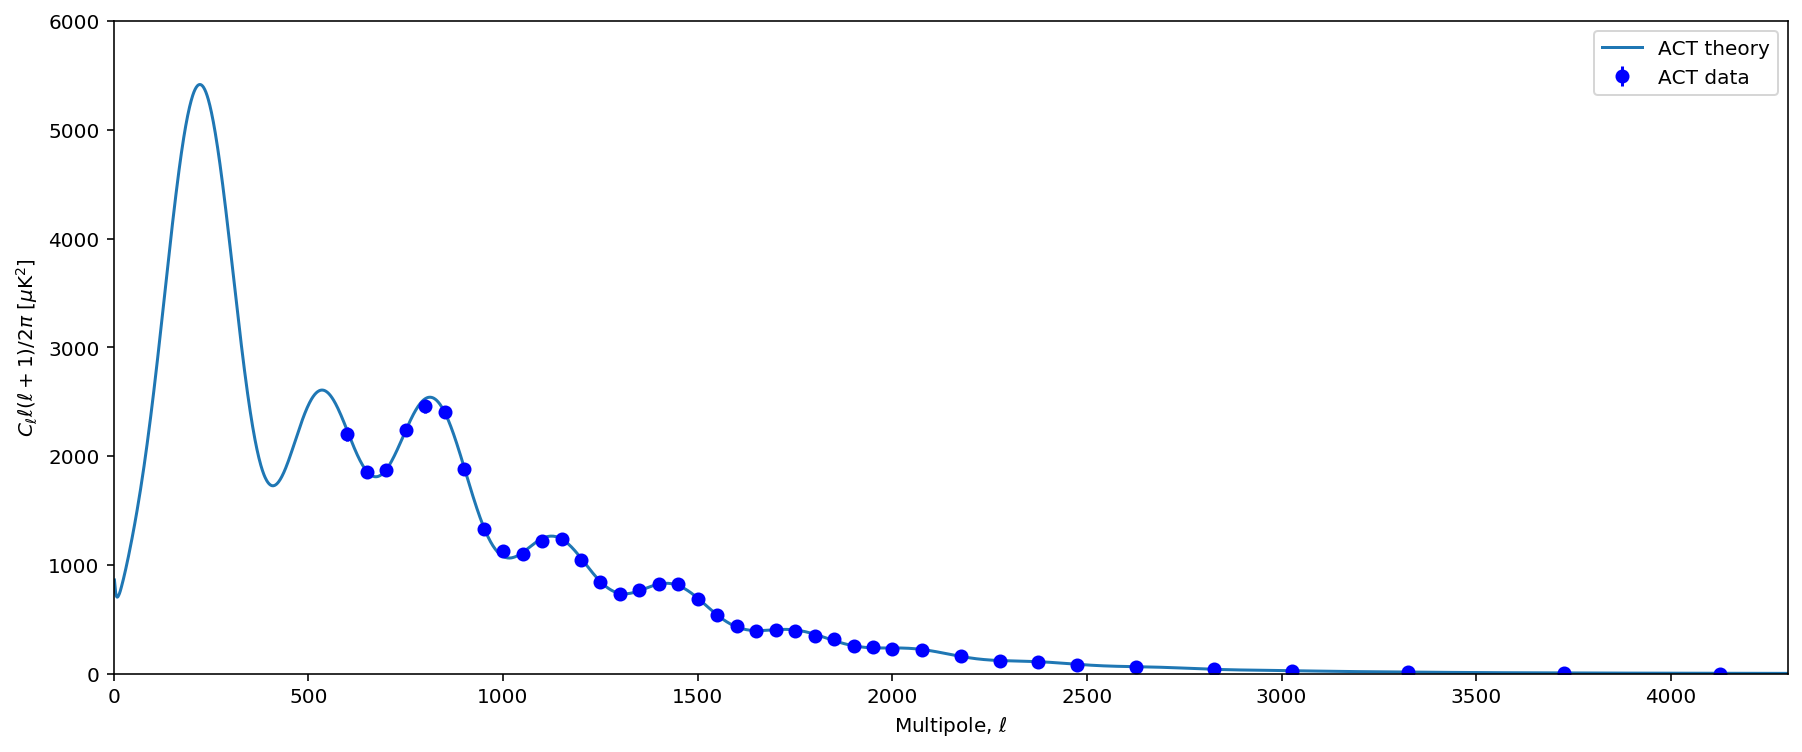

In [195]:
wmin=130  #first element of TT for wide patch
wmax=130+40 #last element of TT for wide patch
                                                      
TT_bval=like.bval[wmin:wmax]
TT_dat=like.X_data[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)
TT_err=like.X_sig[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)

plt.figure(figsize=(15,6))
plt.plot(ell, dell_tt, "-", label="ACT theory")
plt.errorbar(TT_bval,TT_dat,yerr = TT_err, fmt='bo',label="ACT data")
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)
plt.ylim(0,6000)

Now identify the bandpower window functions to bin the theory, plot residuals, and also print simplified diagonal chisq (for full chisq use the full likelihood)

ACT TT-wide diagonal chi2 = 39.28 for 40 data points


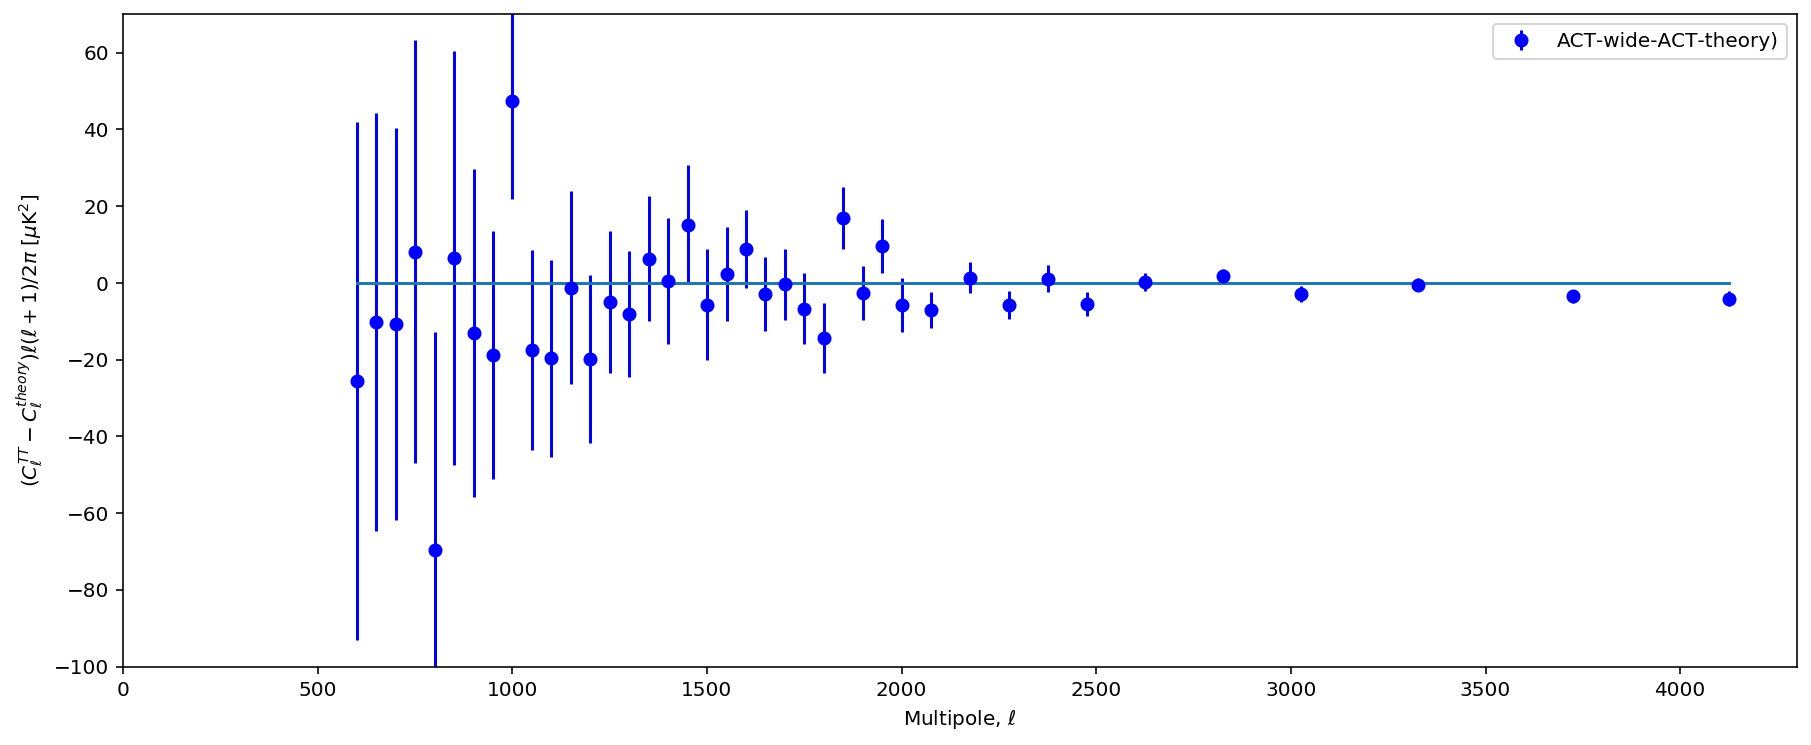

In [196]:
l_list = np.array(range(2, like.tt_lmax + 1))

#X_model[:nbintt] = cl_tt_d[b0 : b0 + nbintt]

#Bin TT
cltt = np.zeros(like.lmax_win)
#First turn theory Dell into Cell
cltt[1 : like.tt_lmax] = (dell_tt[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)
#now bin theory
bmax, lmax_win = like.bmax, like.lmax_win
cth_tt = like.win_func_w[2 * bmax : 3 * bmax, 1:lmax_win] @ cltt[1:lmax_win] 
#scale back to binned Dell by l(l+1)/2pi
dth_tt = cth_tt[like.b0:like.b0+like.nbintt]*like.bval[wmin:wmax]**2/(2.*np.pi) 

#Plot residuals
plt.figure(figsize=(15,6))
plt.errorbar(TT_bval,TT_dat-dth_tt,yerr = TT_err, fmt='bo',label="ACT-wide-ACT-theory)")
plt.plot(TT_bval, (TT_dat-dth_tt)*0.)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{TT}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)
plt.ylim(-100,70)


chi_act_TT = (TT_dat-dth_tt)**2/TT_err**2
print("ACT TT-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_TT))+ " for 40 data points")

(0, 4300)

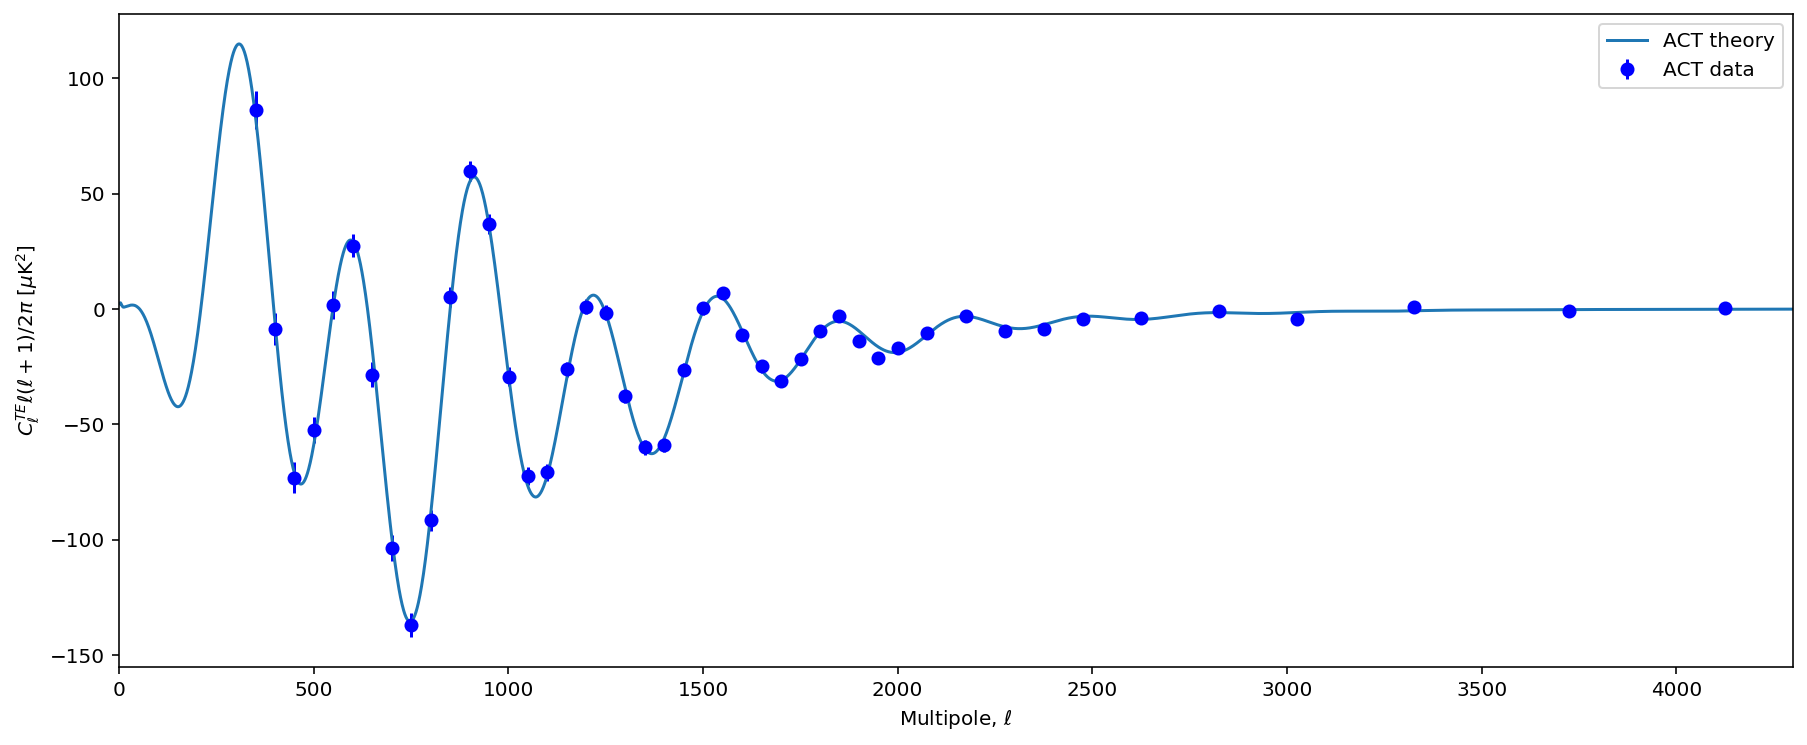

In [197]:
wmin=130+40  #first element of TE for wide patch
wmax=130+40+45 #last element of TE for wide patch
                                                      
TE_bval=like.bval[wmin:wmax]
TE_dat=like.X_data[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)
TE_err=like.X_sig[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)

plt.figure(figsize=(15,6))
plt.plot(ell, dell_te, "-", label="ACT theory")
plt.errorbar(TE_bval,TE_dat,yerr = TE_err, fmt='bo', label="ACT data")
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$C_{\ell}^{TE} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)


Now bin the theory to plot residuals, and also print simplified diagonal chisq (for full chisq use the full likelihood)

ACT TE-wide diagonal chi2 = 40.77 for 45 data points


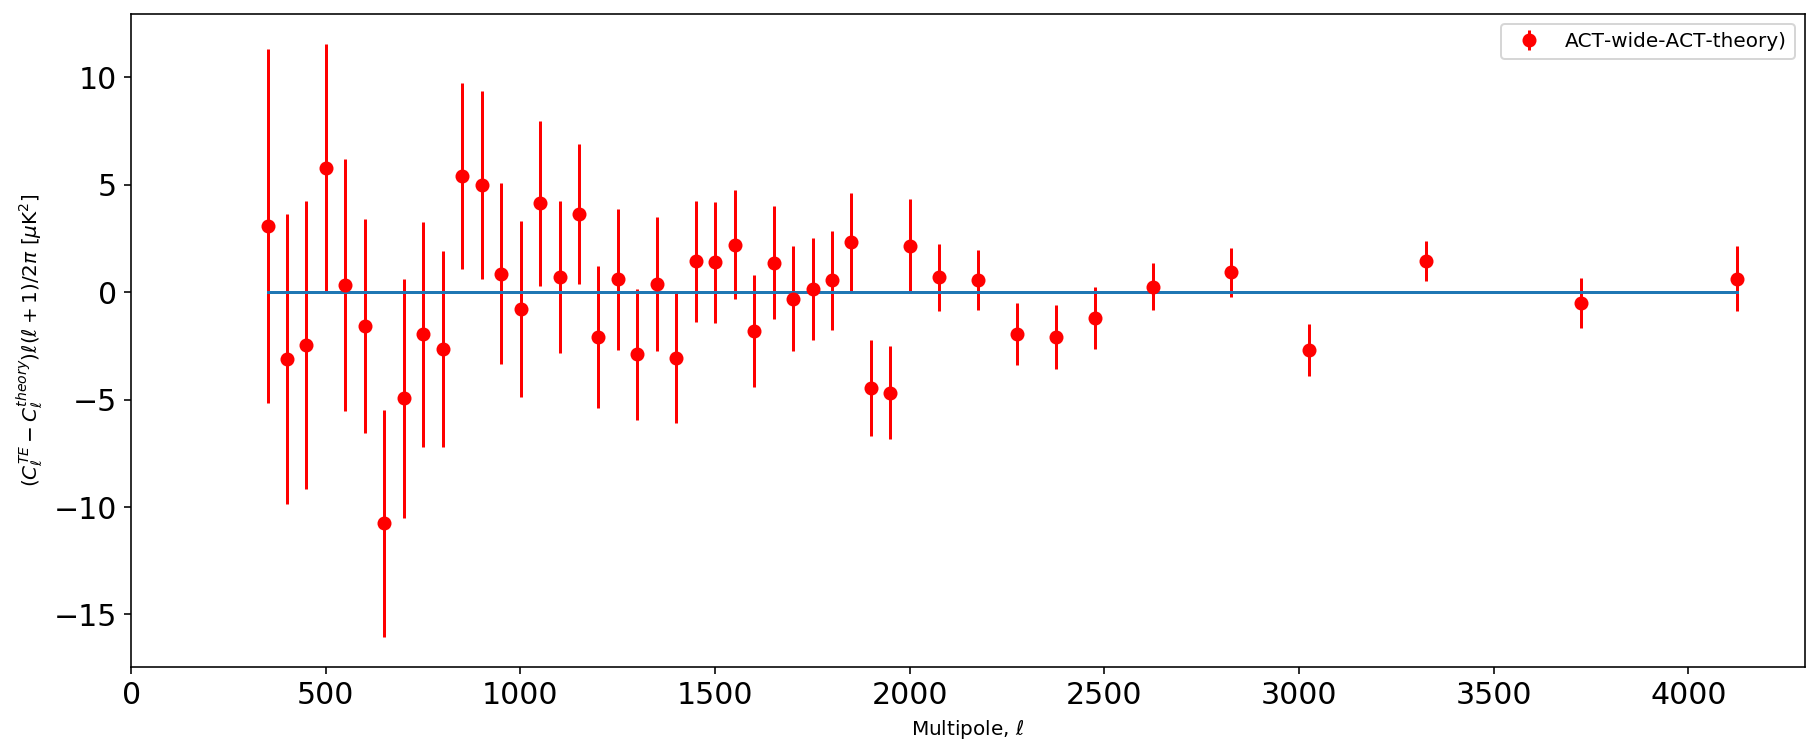

In [198]:
#Bin TE
clte = np.zeros(like.lmax_win)
#First turn theory Dell into Cell
clte[1 : like.tt_lmax] = (dell_te[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)
#now bin theory
bmax, lmax_win = like.bmax, like.lmax_win
cth_te = like.win_func_w[6 * bmax : 7 * bmax, 1:lmax_win] @ clte[1:lmax_win] 
#scale back to binned Dell by l(l+1)/2pi
dth_te = cth_te[:like.nbinte]*like.bval[wmin:wmax]**2/(2.*np.pi) 

#Plot residuals
plt.figure(figsize=(15,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.errorbar(TE_bval,TE_dat-dth_te,yerr = TE_err, fmt='ro',label="ACT-wide-ACT-theory)")
plt.plot(TE_bval, (TE_dat-dth_te)*0.)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{TE}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)

chi_act_TE = (TE_dat-dth_te)**2/TE_err**2
print("ACT TE-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_TE))+ " for 45 data points")

And repeat for EE

(-10, 50)

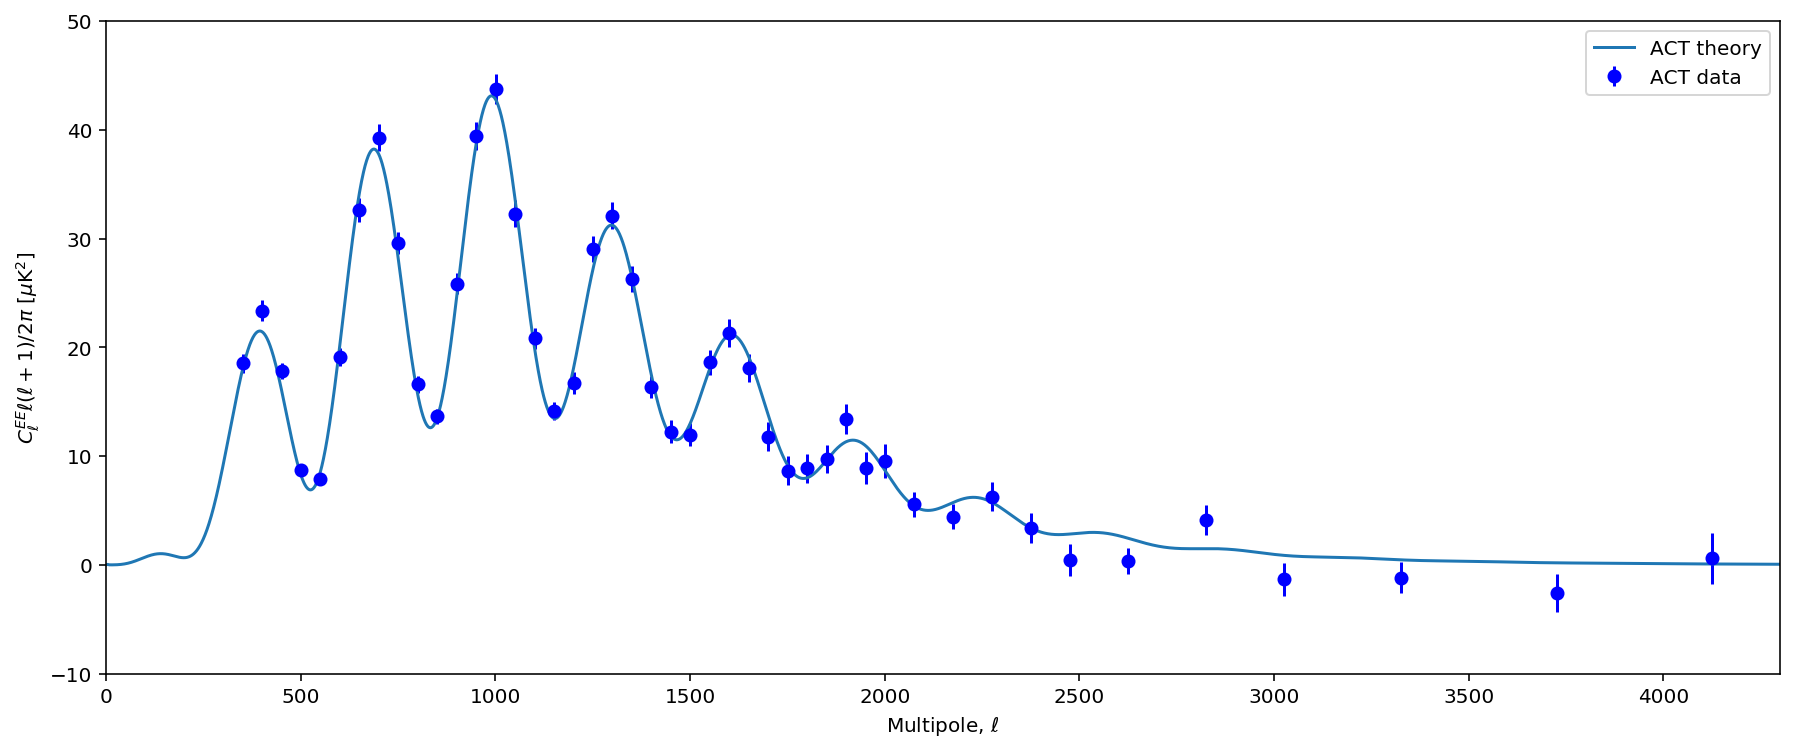

In [199]:
wmin=130+85  #first element of EE for wide patch
wmax=130+85+45 #last element of EE for wide patch
                                                      
EE_bval=like.bval[wmin:wmax]
EE_dat=like.X_data[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)
EE_err=like.X_sig[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)

plt.figure(figsize=(15,6))
plt.plot(ell, dell_ee, "-", label="ACT theory")
plt.errorbar(EE_bval,EE_dat,yerr = EE_err, fmt='bo', label="ACT data")
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$C_{\ell}^{EE} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)
plt.ylim(-10,50)

ACT EE diagonal chi2 = 59.32 for 45 data points


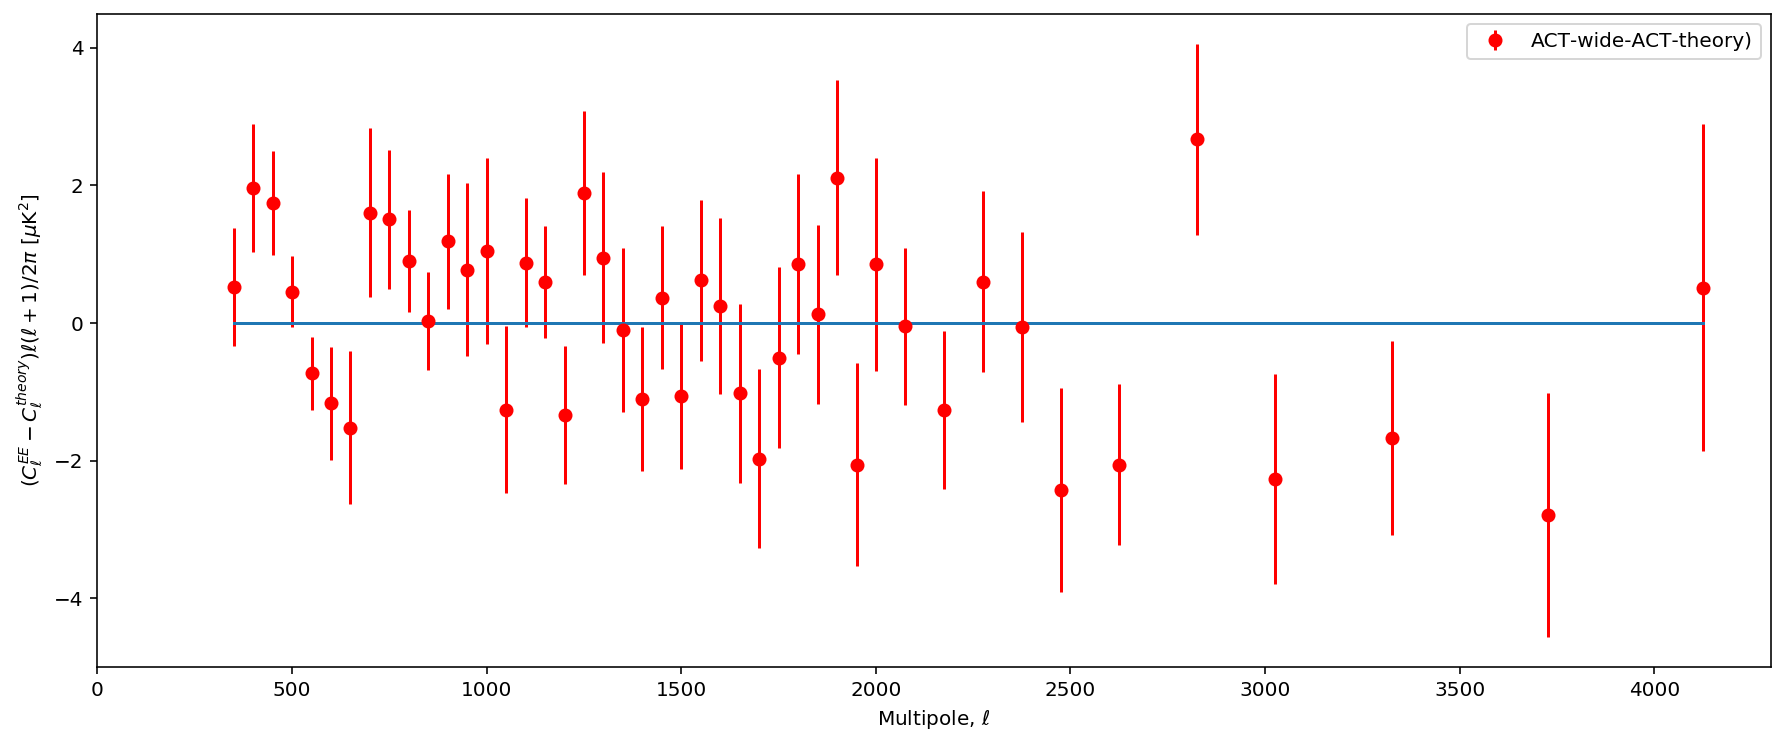

In [200]:
#Bin EE
clee = np.zeros(like.lmax_win)
#First turn theory Dell into Cell
clee[1 : like.tt_lmax] = (dell_ee[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)
#now bin theory
bmax, lmax_win = like.bmax, like.lmax_win
cth_ee = like.win_func_w[9 * bmax : 10 * bmax, 1:lmax_win] @ clee[1:lmax_win] 
#scale back to binned Dell by l(l+1)/2pi
dth_ee = cth_ee[:like.nbinee]*like.bval[wmin:wmax]**2/(2.*np.pi) 

#Plot residuals
plt.figure(figsize=(15,6))
plt.errorbar(EE_bval,EE_dat-dth_ee,yerr = EE_err, fmt='ro',label="ACT-wide-ACT-theory)")
plt.plot(EE_bval, (EE_dat-dth_ee)*0.)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{EE}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)

chi_act_EE = (EE_dat-dth_ee)**2/EE_err**2
print("ACT EE diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_EE))+ " for 45 data points")